In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os

In [3]:
lsdir = os.listdir()
txts = [fn for fn in lsdir if fn.endswith('.txt')]
txts = sorted(txts)
txts

['26_03_2019__16_42.txt', '27_03_2019__09_05.txt', '27_03_2019__09_06.txt']

In [4]:
with open(txts[-1], 'r') as f:
    header = f.readline()
    data = f.read()

In [5]:
data = data.split('epoch=')[1:]
epoch_loss = []
for d in data:
    bs_idx_start = d.find('batch_sizes=[') + len('batch_sizes=[')
    bs_idx_end = d.find(']\nloss')
    l_idx_start = d.find('loss=[') + len('loss=[')
    l_idx_end = d.find(']', l_idx_start)
    bs = d[bs_idx_start: bs_idx_end]
    bs = list(map(int, bs.split(',')))
    l = d[l_idx_start: l_idx_end]
    l = list(map(float, l.split(',')))
    assert len(bs) == len(l)
    total_images = sum(bs)
    total_loss = sum(l)
    average_loss = total_loss / total_images
    epoch_loss.append(average_loss)

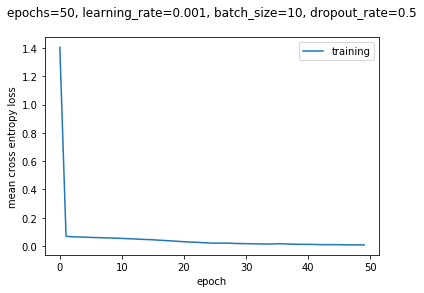

In [15]:
plt.plot(epoch_loss, label='training')
plt.xlabel('epoch')
plt.ylabel('mean cross entropy loss')
plt.title(header)
plt.legend()
plt.savefig('test.png')

<Figure size 432x288 with 0 Axes>

In [7]:
import numpy as np
import cv2
from cv2 import VideoWriter, VideoWriter_fourcc, imread
from matplotlib.pyplot import imshow

In [8]:
FPS = 4

In [10]:
def process(im, txt):
    height, width, channel = im.shape
    text_height = 40
    img = np.zeros((height + text_height,width,channel), np.uint8)
    img[0:height] = im[:]
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, txt,(int(width/2) - int(width/5),height + text_height - 10), font, 1,(255,0,0),2,cv2.LINE_AA)
    return img
    

In [11]:
im = imread(os.path.join(test_out_dir, images_fn[0]))
im = process(im, 'random')
height, width, channel = im.shape

fourcc = VideoWriter_fourcc(*'MP42')
video = VideoWriter('./' + test_out_dir.split('/')[-1].split('.')[0] + '.avi', fourcc, float(FPS), (width, height))

for im_fn in images_fn:
    frame = imread(os.path.join(test_out_dir, im_fn))
    video.write(process(frame, im_fn))
video.release()